# dose - deps plot programs 

### define the functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def MakeDoseList_scorp(filename, Z, scorp_x, scorp_y):
    data_origin = pd.read_csv(filename)

    data_scorp_y = data_origin[data_origin['iy'] == scorp_y]
    data_scorp_xy = data_scorp_y[data_scorp_y['ix'] == scorp_x].drop(columns = ['ix','iy','iz'])
    
    list_z = np.zeros(Z)
    for i in range(Z):
        list_z[i] = 0.2 * i
    
    return list_z, data_scorp_xy

In [4]:
def MakeDoseList_z(filename,Z):

    data_origin = pd.read_csv(filename)
    
    data_dose = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","iz"])
    data_z = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","dose"])
    
    deps = np.zeros(Z)
    list_z = np.zeros(Z)
    
    for i in range(len(data_z)):
        deps[data_z.iloc[i]] += data_dose.iloc[i]
    for i in range(Z):
        list_z[i] = 0.2 * i

    return list_z,deps

### Import csv data written by boxcell order

In [6]:
z,deps_beam = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150)

In [7]:
z,deps_gun = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150)

In [8]:
z,deps_my_gun = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv",150)

In [9]:
z,deps_my_beam = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv",150)

### Import csv data written by boxcell order (x,y) = (30,30)

In [12]:
z,deps_my_beam_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv',150,30,30)

In [46]:
z,deps_my_gun_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv',150,30,30)

In [14]:
z,deps_beam_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150,30,30)

In [42]:
z,deps_gun_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150,30,30)

### Plot deps -dose

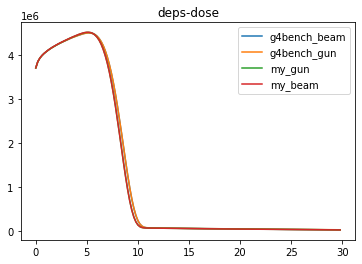

In [16]:
plt.plot(z,deps_beam, label = "g4bench_beam")
plt.plot(z,deps_gun,  label = "g4bench_gun")
plt.plot(z,deps_my_gun, label= "my_gun")
plt.plot(z,deps_my_beam, label = "my_beam")
plt.title("deps-dose")
plt.legend()
plt.show()

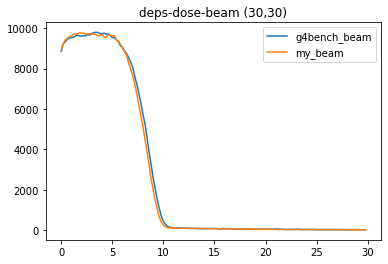

In [19]:
plt.plot(z,deps_beam_scorp, label = "g4bench_beam")
plt.plot(z,deps_my_beam_scorp, label = "my_beam")
plt.title("deps-dose-beam (30,30)")
plt.legend()
plt.show()

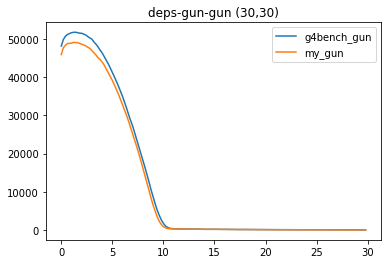

In [47]:
plt.plot(z,deps_gun_scorp,  label = "g4bench_gun")
plt.plot(z,deps_my_gun_scorp, label= "my_gun")
plt.title("deps-gun-gun (30,30)")
plt.legend()
plt.show()